In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [46]:
dataset = pd.read_csv('Oldcar_dataset.csv')
dataset.head(2)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75


In [47]:
dataset.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       200 non-null    object 
 1   Year           200 non-null    int64  
 2   Present_Price  200 non-null    float64
 3   Kms_Driven     200 non-null    int64  
 4   Fuel_Type      200 non-null    object 
 5   Seller_Type    200 non-null    object 
 6   Transmission   200 non-null    object 
 7   Owner          200 non-null    int64  
 8   Selling_Price  200 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 14.2+ KB


In [49]:
dataset.head(3)      

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25


# Car_name

In [50]:
# Using Label Encoding - Label Encoding is a technique used to convert categorical data (like names, colors, or categories)
# into numerical values so that machine learning models can process them.

Car_Name_le = LabelEncoder()
dataset['Car_Name'] = Car_Name_le.fit_transform(dataset["Car_Name"])

# Fuel_Type

In [51]:
dataset['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [52]:
Fuel_Type_le = LabelEncoder()
dataset['Fuel_Type'] = Fuel_Type_le.fit_transform(dataset["Fuel_Type"])

# Seller_Type

In [53]:
dataset['Fuel_Type'].unique()

array([2, 1, 0])

In [54]:
Seller_Type_le = LabelEncoder()
dataset['Seller_Type'] = Seller_Type_le.fit_transform(dataset["Seller_Type"])

# Transmission	

In [55]:
Transmission_le = LabelEncoder()
dataset['Transmission'] = Transmission_le.fit_transform(dataset["Transmission"])

In [56]:
dataset.head(3)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,28,2014,5.59,27000,2,0,1,0,3.35
1,31,2013,9.54,43000,1,0,1,0,4.75
2,6,2017,9.85,6900,2,0,1,0,7.25


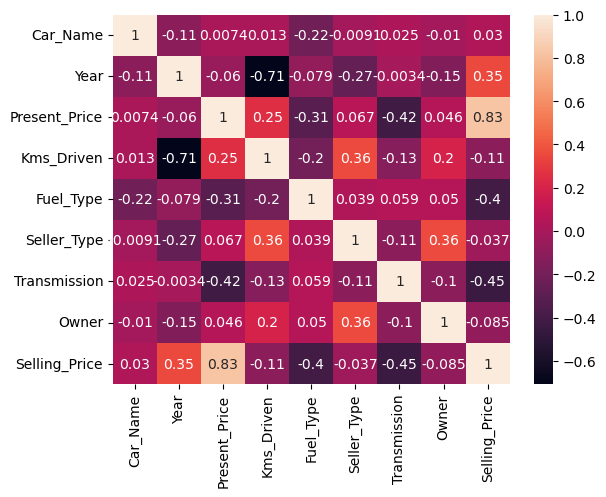

In [57]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [58]:
input_data = dataset.iloc[:,:-1]              # Not taking selling price
output_data = dataset["Selling_Price"]

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
# Scalling the input data

ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data), columns= input_data.columns)

In [61]:
input_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.172550,0.142383,-0.608594,-0.526741,0.656488,-0.160128,0.42829,-0.138593
1,1.470026,-0.204892,-0.162655,0.058328,-1.395037,-0.160128,0.42829,-0.138593
2,-1.008938,1.184206,-0.127657,-1.261734,0.656488,-0.160128,0.42829,-0.138593
3,1.767501,-0.899441,-0.771164,-1.323898,0.656488,-0.160128,0.42829,-0.138593
4,1.370867,0.142383,-0.464087,0.038217,-1.395037,-0.160128,0.42829,-0.138593
...,...,...,...,...,...,...,...,...
195,-0.909780,0.836932,0.069911,-0.271212,-1.395037,-0.160128,0.42829,-0.138593
196,-1.207255,0.489657,-0.573596,0.679965,0.656488,-0.160128,0.42829,-0.138593
197,-0.909780,-1.593990,0.002173,1.701422,0.656488,-0.160128,0.42829,-0.138593
198,-0.909780,1.184206,0.171517,-1.184944,-1.395037,-0.160128,0.42829,-0.138593


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
                                # Calling train_test_split passing input and output data, trainning size

x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, train_size=0.2, random_state=42)

In [91]:
# Supervised Learning Algorithms

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Fit and transform training labels
y_test = le.transform(y_test)  # Only transform test labels (Don't fit again)


In [95]:
# Example: Convert continuous target variable to categorical
import pandas as pd

y = pd.cut(y_test, bins=5, labels=False)  # Discretize into 5 categories


In [96]:
print("Unique labels in y_train:", set(y_train))
print("Unique labels in y_test:", set(y_test))


Unique labels in y_train: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36}
Unique labels in y_test: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 23, 33, 35}


In [65]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [66]:
print(x_train.shape)  # Number of rows and columns in X_train
print(y_train.shape)  # Number of rows in y_train


(40, 8)
(40,)


In [ ]:
# Trying LinearRegression Technique

# lr = LinearRegression()
# lr.fit(x_train, y_train)

# train_score = lr.score(x_train, y_train) * 100  # Training R² Score
# test_score = lr.score(x_test, y_test) * 100  # Testing R² Score

# train_score, test_score


(92.25177046034881, 83.52844197884153)

In [ ]:
# mean_squared_error(y_test, lr.predict(x_test)), mean_absolute_error(y_test, lr.predict(x_test))

(4.620410179484432, 1.378218752416298)

In [69]:
# lr1 = Lasso(alpha=4)
# lr1.fit(x_train, y_train)

# train_score = lr1.score(x_train, y_train) * 100  # Training R² Score
# test_score = lr1.score(x_test, y_test) * 100  # Testing R² Score

# train_score, test_score

In [70]:
# Trying Ridge Technique 

# lr2 = Ridge(alpha=10)
# lr2.fit(x_train, y_train)
# lr2.score(x_train, y_train) * 100, lr2.score(x_test, y_test) * 100

In [71]:
# Trying ElasticNet Technique 

# lr3 = ElasticNet(alpha=0.5)
# lr3.fit(x_train, y_train)
# lr3.score(x_train, y_train) * 100, lr3.score(x_test, y_test) * 100

In [72]:
# Decision Tree Technique

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

train_score = dt.score(x_train, y_train) * 100  # Training R² Score
test_score = dt.score(x_test, y_test) * 100  # Testing R² Score

train_score, test_score

(100.0, 66.16680712864029)

In [73]:
mean_squared_error(y_test, dt.predict(x_test)), mean_absolute_error(y_test, dt.predict(x_test))

(9.490494375, 1.8306874999999998)

In [74]:
dt.predict([[-0.711463, -0.552167, 0.861311, 1.118767, 0.656488, -0.160128, 0.428290, -0.138593]])

c:\Users\alimo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5.9])

In [75]:
y_test

95      5.85
15      7.75
30      3.10
158     3.90
128     3.10
       ...  
59     19.99
171     7.50
131    11.45
17      7.75
72      7.45
Name: Selling_Price, Length: 160, dtype: float64

In [76]:
x_test

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
95,-0.711463,-0.552167,0.861311,1.118767,0.656488,-0.160128,0.428290,-0.138593
15,-0.215670,0.836932,-0.021535,0.058328,-1.395037,-0.160128,0.428290,-0.138593
30,1.172550,-0.552167,-0.564564,0.366916,-1.395037,-0.160128,0.428290,-0.138593
158,-1.405572,0.142383,-0.449410,-0.195665,0.656488,-0.160128,0.428290,-0.138593
128,0.577599,-0.552167,-0.473119,0.392257,-1.395037,-0.160128,0.428290,-0.138593
...,...,...,...,...,...,...,...,...
59,0.280123,0.142383,2.820055,-0.014805,-1.395037,-0.160128,-2.334869,-0.138593
171,-0.909780,0.489657,-0.110723,-0.504801,0.656488,-0.160128,0.428290,-0.138593
131,-0.413987,0.489657,0.430049,-1.042333,0.656488,-0.160128,-2.334869,-0.138593
17,-0.215670,0.836932,-0.021535,0.058328,-1.395037,-0.160128,0.428290,-0.138593


In [77]:
new_data= pd.DataFrame([['ritz', 2014, 5.59, 27000, 'Petrol', 'Dealer', 'Manual', 0]],columns= x_train.columns)


In [78]:
new_data                  

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0


In [86]:
dt.predict(new_data)

array([3.5])

In [80]:
new_data['Car_Name'] = Car_Name_le.transform(new_data["Car_Name"])

In [81]:
new_data['Fuel_Type'] = Fuel_Type_le.transform(new_data["Fuel_Type"])

In [82]:
new_data['Seller_Type'] = Seller_Type_le.transform(new_data["Seller_Type"])

In [94]:
new_data['Transmission'] = Transmission_le.transform(new_data["Transmission"])

ValueError: y contains previously unseen labels: 0.4282895663715403

In [85]:
new_data = pd.DataFrame(ss.transform(new_data), columns=new_data.columns)   # Scailling new_data

In [ ]:
# # Trying Ridge Technique 

# rf = RandomForestRegressor(n_estimators=100)
# rf.fit(x_train, y_train)
# rf.score(x_train, y_train) * 100, rf.score(x_test, y_test) * 100

(95.47125908384042, 74.16290964914816)

In [ ]:
# mean_squared_error(y_test, rf.predict(x_test)), mean_absolute_error(y_test, rf.predict(x_test))

(7.2475205509999965, 1.4368874999999992)

In [ ]:
# sv = SVR()
# sv.fit(x_train, y_train)
# sv.score(x_train, y_train) * 100, sv.score(x_test, y_test) * 100

(26.840991170791227, 13.386140596447804)

In [ ]:
# knn = KNeighborsRegressor(n_neighbors=20)
# knn.fit(x_train, y_train)
# knn.score(x_train, y_train) * 100, knn.score(x_test, y_test) * 100

(28.13596853922804, 18.593061973084644)

In [ ]:
# mean_squared_error(y_test, knn.predict(x_test)), mean_absolute_error(y_test, knn.predict(x_test))

(22.8353289140625, 2.888165625)